Ex. 1
1. In the first exercise you will use generate data() function from pyod.utils.data
to generate a 3-dimensional dataset with 300 training samples and 200 test
samples using a contamination of 0.15.

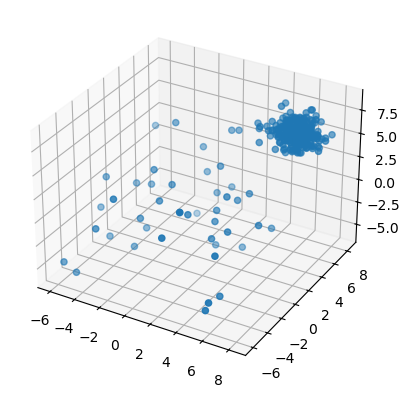

In [3]:
from pyod.utils.data import generate_data
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = generate_data(n_train=300, 
                                                 n_test=200, 
                                                 n_features=3, 
                                                 contamination=0.15,
                                                 random_state=42)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2])
plt.show()

2. You will fit an OCSVM model (from pyod.models.ocsvm) using the
training data and then you will predict the labels for test data. Use the
linear kernel and the contamination rate specified above. Compute the
balanced accuracy and the ROC AUC for the test data

In [4]:
from pyod.models.ocsvm import OCSVM
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

clf_ocsvm_linear = OCSVM(kernel='linear', contamination=0.15)
clf_ocsvm_linear.fit(X_train)

y_train_pred = clf_ocsvm_linear.labels_  
y_train_scores = clf_ocsvm_linear.decision_scores_  

y_test_pred = clf_ocsvm_linear.predict(X_test)
y_test_scores = clf_ocsvm_linear.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"OCSVM (linear kernel): \n   balanced accuracy: {ba}, ROC_AUC scores: {roc_auc}")


OCSVM (linear kernel): 
   balanced accuracy: 0.9833333333333334, ROC_AUC scores: 1.0


3. Create 4 3D subplots where you will plot the test and training data (using
different colors for inliers and outliers) for both the ground truth and the
predicted labels.

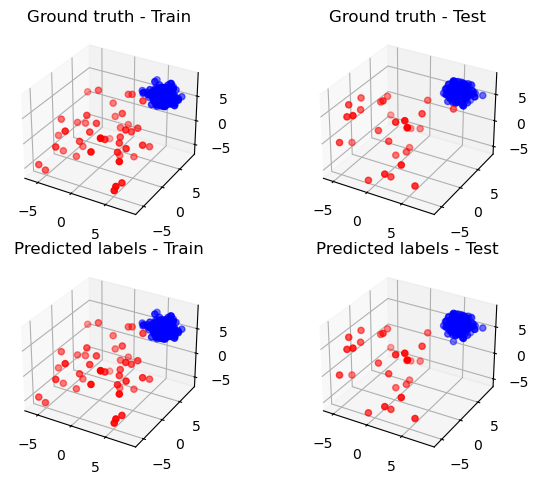

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.7))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(*X_train[y_train == 0].T, c='blue')
ax.scatter(*X_train[y_train == 1].T, c='red')
ax.set_title("Ground truth - Train")     

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(*X_test[y_test == 0].T, c='blue')
ax.scatter(*X_test[y_test == 1].T, c='red')
ax.set_title("Ground truth - Test")    

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(*X_train[y_train_pred == 0].T, c='blue')
ax.scatter(*X_train[y_train_pred == 1].T, c='red')
ax.set_title("Predicted labels - Train")   

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(*X_test[y_test_pred == 0].T, c='blue')
ax.scatter(*X_test[y_test_pred == 1].T, c='red')
ax.set_title("Predicted labels - Test")   

plt.tight_layout()
plt.show()



4. Observe how the predicted labels change when you use an RBF kernel.

OCSVM (RBF kernel): 
   balanced accuracy: 0.9803921568627452, ROC_AUC scores: 0.9998039215686275


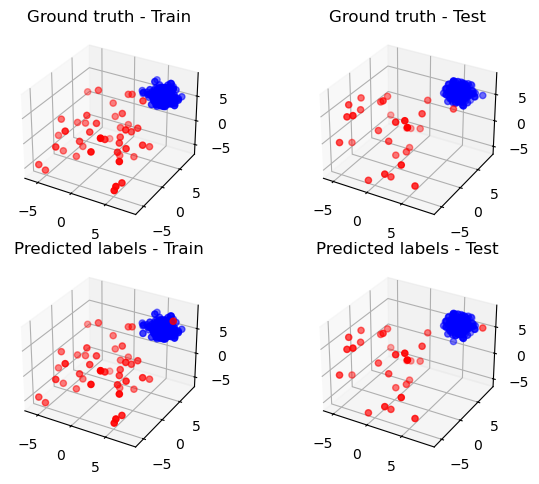

In [6]:
clf_ocsvm_rbf = OCSVM(kernel='rbf', contamination=0.15)
clf_ocsvm_rbf.fit(X_train)

y_train_pred = clf_ocsvm_rbf.labels_  
y_train_scores = clf_ocsvm_rbf.decision_scores_  

y_test_pred = clf_ocsvm_rbf.predict(X_test)
y_test_scores = clf_ocsvm_rbf.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"OCSVM (RBF kernel): \n   balanced accuracy: {ba}, ROC_AUC scores: {roc_auc}")

fig = plt.figure(figsize=plt.figaspect(0.7))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(*X_train[y_train == 0].T, c='blue')
ax.scatter(*X_train[y_train == 1].T, c='red')
ax.set_title("Ground truth - Train")     

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(*X_test[y_test == 0].T, c='blue')
ax.scatter(*X_test[y_test == 1].T, c='red')
ax.set_title("Ground truth - Test")    

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(*X_train[y_train_pred == 0].T, c='blue')
ax.scatter(*X_train[y_train_pred == 1].T, c='red')
ax.set_title("Predicted labels - Train")   

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(*X_test[y_test_pred == 0].T, c='blue')
ax.scatter(*X_test[y_test_pred == 1].T, c='red')
ax.set_title("Predicted labels - Test")   

plt.tight_layout()
plt.show()


5. Perform steps 2 and 3 for DeepSVDD model from pyod.models.deep svdd

Epoch 1/50, Loss: 0.0010045968301710673
Epoch 2/50, Loss: 0.0010131345698027872
Epoch 3/50, Loss: 0.000975576534983702
Epoch 4/50, Loss: 0.0011111009298474528
Epoch 5/50, Loss: 0.001174418233858887
Epoch 6/50, Loss: 0.0012247845515958034
Epoch 7/50, Loss: 0.0012342722548055463
Epoch 8/50, Loss: 0.001084764073311817
Epoch 9/50, Loss: 0.001054240761732217
Epoch 10/50, Loss: 0.0010685438464861363
Epoch 11/50, Loss: 0.0010419158061267808
Epoch 12/50, Loss: 0.0010103360400535166
Epoch 13/50, Loss: 0.0011400892253732309
Epoch 14/50, Loss: 0.0010825942226801999
Epoch 15/50, Loss: 0.001020429568598047
Epoch 16/50, Loss: 0.0009874217721517198
Epoch 17/50, Loss: 0.0010219838804914616
Epoch 18/50, Loss: 0.0009934948684531264
Epoch 19/50, Loss: 0.0010152477771043777
Epoch 20/50, Loss: 0.0011229218216612935
Epoch 21/50, Loss: 0.0010283803349011578
Epoch 22/50, Loss: 0.0010243113210890442
Epoch 23/50, Loss: 0.001024024619255215
Epoch 24/50, Loss: 0.0010692702053347602
Epoch 25/50, Loss: 0.0010164580

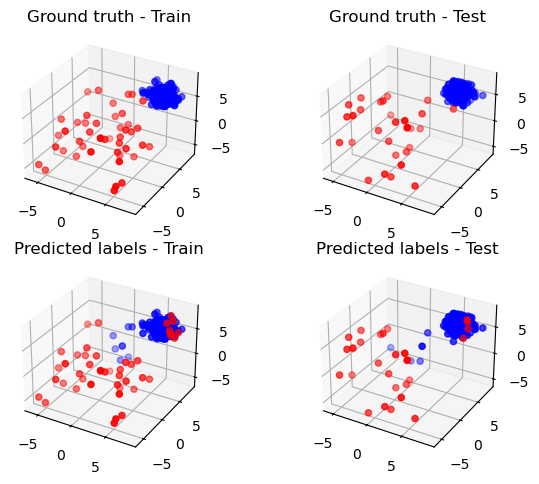

In [7]:
from pyod.models.deep_svdd import DeepSVDD

clf_deepsvdd = DeepSVDD(n_features=3, contamination=0.15, hidden_neurons=[1024, 512, 256, 128, 64, 32, 16], epochs=50)
clf_deepsvdd.fit(X_train)

y_train_pred = clf_deepsvdd.labels_  
y_train_scores = clf_deepsvdd.decision_scores_  

y_test_pred = clf_deepsvdd.predict(X_test)
y_test_scores = clf_deepsvdd.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"Deep SVDD: \n   balanced accuracy: {ba}, ROC_AUC scores: {roc_auc}")

fig = plt.figure(figsize=plt.figaspect(0.7))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(*X_train[y_train == 0].T, c='blue')
ax.scatter(*X_train[y_train == 1].T, c='red')
ax.set_title("Ground truth - Train")     

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(*X_test[y_test == 0].T, c='blue')
ax.scatter(*X_test[y_test == 1].T, c='red')
ax.set_title("Ground truth - Test")    

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(*X_train[y_train_pred == 0].T, c='blue')
ax.scatter(*X_train[y_train_pred == 1].T, c='red')
ax.set_title("Predicted labels - Train")   

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(*X_test[y_test_pred == 0].T, c='blue')
ax.scatter(*X_test[y_test_pred == 1].T, c='red')
ax.set_title("Predicted labels - Test")   

plt.tight_layout()
plt.show()

Ex. 2
1. In this exercise you will use the cardio dataset from ODDS (https://
odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/). You will split
the dataset into a training set consisting of 40% of the data and a testing
set.

In [8]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

data = loadmat('cardio.mat')
X = data['X'] 
y = data['y'].ravel()  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


2. You will use a cross-validation grid-search over a predefined map of possible parameters of OneClassSVM (from sklearn.svm) in order to find
the ones that offer best results. The map of possible parameters must
contain different kernels, different values for gamma parameter (for kernels that use it) and different values for the ν parameter (including the
contamination rate of train set).

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score

param_grid = {
    'ocsvm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'ocsvm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],    
    'ocsvm__nu': [0.1, 0.3, 0.5, 0.7, 0.9],               
}

pipeline = Pipeline([
    # ('scaler', StandardScaler()),  
    ('ocsvm', OneClassSVM())       
])

3. GridSearchCV from sklearn.model selection will be used to perform the
grid-search over the training set using Balanced Accuracy as score. The
same metric will be reported for the model trained with the best param-
eters discovered by GridSearchCV (tested on the test set).

In [10]:
from sklearn.model_selection import GridSearchCV

def balanced_accuracy_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    # predictions = np.where(predictions == -1, 0, 1)
    return balanced_accuracy_score(y, predictions)


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=balanced_accuracy_score,
    cv=5,  
    verbose=1,
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Balanced Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = balanced_accuracy_scorer(best_model, X_test, y_test)
print("Test Balanced Accuracy:", test_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'ocsvm__gamma': 'scale', 'ocsvm__kernel': 'linear', 'ocsvm__nu': 0.1}
Best Cross-Validated Balanced Accuracy: nan
Test Balanced Accuracy: 0.36538461538461536


c:\ProgramData\miniconda3\envs\env_gpu\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\ProgramData\miniconda3\envs\env_gpu\Lib\site-packages\sklearn\metrics\_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


4. GridSearchCV will have to perform standardization; for this, it will
use a Pipeline from sklearn.pipeline that will perform standardization
using StandardScaler before fitting the OneClassSVM model.

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('ocsvm', OneClassSVM())       
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=balanced_accuracy_scorer,
    cv=5,  
    verbose=1,
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Balanced Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = balanced_accuracy_scorer(best_model, X_test, y_test)
print("Test Balanced Accuracy:", test_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'ocsvm__gamma': 'scale', 'ocsvm__kernel': 'poly', 'ocsvm__nu': 0.1}
Best Cross-Validated Balanced Accuracy: 0.43394957983193283
Test Balanced Accuracy: 0.42788461538461536


c:\ProgramData\miniconda3\envs\env_gpu\Lib\site-packages\sklearn\metrics\_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


5. You have to pay attention to the labels returned by OneClassSVM model
(from sklearn): -1 for outliers and 1 for inliers. If you want to convert
them to the pyod format you can use
label pyod = (−1 ∗ label sklearn + 1)/2
In the current exercise you will perform the conversion from pyod format
to sklearn for the ground truth labels

In [12]:
def sklearn_to_pyod(y_sklearn):
    return (-1 * y_sklearn + 1) // 2

def pyod_to_sklearn(y_pyod):
    return 1 - 2 * y_pyod

y_train_sklearn = pyod_to_sklearn(y_train)
y_test_sklearn = pyod_to_sklearn(y_test)

6. Print the best parameters discovered by GridSearchCV and the bal-
anced accuracy obtained by the model (trained with those parameters on
the entire training dataset) when evaluating the testing set.

In [13]:
grid_search.fit(X_train, y_train_sklearn)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Balanced Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = balanced_accuracy_scorer(best_model, X_test, y_test_sklearn)
print("Test Balanced Accuracy:", test_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.3}
Best Cross-Validated Balanced Accuracy: 0.8754121889722135
Test Balanced Accuracy: 0.8675541167375338


Ex. 3
1. For this exercise we will need to download the shuttle dataset from ODDS
(https://odds.cs.stonybrook.edu/shuttle-dataset/). Load the data
using scipy.io.loadmat() and use train test split() to split it into train
and test subsets (use 50% of data for testing). Normalize your data ac-
cordingly.

In [14]:
data = loadmat("./shuttle.mat")
X = data['X'] 
y = data['y'].ravel() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2. Fit OCSVM and DeepSVDD models (from pyod) using the train-
ing data and compute the balanced accuracy (BA) and the area un-
der the curve for the testing data for both models (ROC AUC - using
sklearn.metrics.roc auc score).

In [15]:
contamination = (y_train.sum()) / y_train.shape[0]
clf_ocsvm = OCSVM(contamination=contamination)
clf_ocsvm.fit(X_train)
y_test_pred = clf_ocsvm.predict(X_test)
y_test_scores = clf_ocsvm.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"OCSVM: \n   Balanced accuracy: {ba}, ROC_AUC: {roc_auc}")

OCSVM: 
   Balanced accuracy: 0.9770524641664438, ROC_AUC: 0.9918840768138005


In [18]:
contamination = (y_train.sum()) / y_train.shape[0]
clf_deepsvdd = DeepSVDD(n_features=9, contamination=contamination)
clf_deepsvdd.fit(X_train)
y_test_pred = clf_deepsvdd.predict(X_test)
y_test_scores = clf_deepsvdd.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"Deep svdd: \n   Balanced accuracy: {ba}, ROC_AUC: {roc_auc}")

Epoch 1/100, Loss: 597.291337504983
Epoch 2/100, Loss: 597.4040320366621
Epoch 3/100, Loss: 597.1546331495047
Epoch 4/100, Loss: 597.2549550682306
Epoch 5/100, Loss: 597.7244514226913
Epoch 6/100, Loss: 597.1878145933151
Epoch 7/100, Loss: 597.3165134638548
Epoch 8/100, Loss: 597.3821773380041
Epoch 9/100, Loss: 596.9501184374094
Epoch 10/100, Loss: 597.1935218274593
Epoch 11/100, Loss: 597.1740128695965
Epoch 12/100, Loss: 597.0289030075073
Epoch 13/100, Loss: 597.0504214763641
Epoch 14/100, Loss: 596.9839586913586
Epoch 15/100, Loss: 598.488099321723
Epoch 16/100, Loss: 597.0776121765375
Epoch 17/100, Loss: 596.9922740012407
Epoch 18/100, Loss: 597.0009964704514
Epoch 19/100, Loss: 597.5885105580091
Epoch 20/100, Loss: 597.2127642184496
Epoch 21/100, Loss: 598.2953636050224
Epoch 22/100, Loss: 597.8322360515594
Epoch 23/100, Loss: 597.0925924032927
Epoch 24/100, Loss: 597.8059505224228
Epoch 25/100, Loss: 597.2680911421776
Epoch 26/100, Loss: 597.0202206671238
Epoch 27/100, Loss: 596

3. Use different architectures for DeepSVDD and compute the 2 aforemen-
tioned metrics for each case.

In [19]:
clf_deepsvdd = DeepSVDD(n_features=9, contamination=contamination, hidden_neurons=[64, 32, 16])
clf_deepsvdd.fit(X_train)
y_test_pred = clf_deepsvdd.predict(X_test)
y_test_scores = clf_deepsvdd.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"Deep svdd ([64, 32, 16]): \n   Balanced accuracy: {ba}, ROC_AUC: {roc_auc}")

Epoch 1/100, Loss: 102.19438001327217
Epoch 2/100, Loss: 97.76129876356572
Epoch 3/100, Loss: 102.27067190222442
Epoch 4/100, Loss: 101.38254697434604
Epoch 5/100, Loss: 96.93437309190631
Epoch 6/100, Loss: 99.62675546389073
Epoch 7/100, Loss: 100.0002838363871
Epoch 8/100, Loss: 97.55171786248684
Epoch 9/100, Loss: 99.07109521888196
Epoch 10/100, Loss: 101.07461097463965
Epoch 11/100, Loss: 99.60134517215192
Epoch 12/100, Loss: 102.05240562185645
Epoch 13/100, Loss: 97.00679600052536
Epoch 14/100, Loss: 103.10996716469526
Epoch 15/100, Loss: 100.39296453818679
Epoch 16/100, Loss: 98.78442095220089
Epoch 17/100, Loss: 96.2002768330276
Epoch 18/100, Loss: 97.86709280498326
Epoch 19/100, Loss: 99.3959737457335
Epoch 20/100, Loss: 97.00958715751767
Epoch 21/100, Loss: 101.29694552719593
Epoch 22/100, Loss: 98.5669459644705
Epoch 23/100, Loss: 99.44394380412996
Epoch 24/100, Loss: 100.70649906247854
Epoch 25/100, Loss: 98.2052056491375
Epoch 26/100, Loss: 101.31353763490915
Epoch 27/100, L

In [20]:
clf_deepsvdd = DeepSVDD(n_features=9, contamination=contamination, hidden_neurons=[1024, 512, 256, 128, 64])
clf_deepsvdd.fit(X_train)
y_test_pred = clf_deepsvdd.predict(X_test)
y_test_scores = clf_deepsvdd.decision_function(X_test)

ba = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"Deep svdd ([1024, 512, 256, 128, 64]): \n   Balanced accuracy: {ba}, ROC_AUC: {roc_auc}")

Epoch 1/100, Loss: 12.282629081280902
Epoch 2/100, Loss: 12.636412346269935
Epoch 3/100, Loss: 12.741418081335723
Epoch 4/100, Loss: 12.416061171796173
Epoch 5/100, Loss: 12.219020777614787
Epoch 6/100, Loss: 13.12158232089132
Epoch 7/100, Loss: 12.660460515646264
Epoch 8/100, Loss: 12.257148655829951
Epoch 9/100, Loss: 13.331852519186214
Epoch 10/100, Loss: 12.027375586563721
Epoch 11/100, Loss: 12.381553540937603
Epoch 12/100, Loss: 12.488691109465435
Epoch 13/100, Loss: 12.567679206375033
Epoch 14/100, Loss: 12.418902856297791
Epoch 15/100, Loss: 12.549653616501018
Epoch 16/100, Loss: 12.3945029953029
Epoch 17/100, Loss: 12.775052895303816
Epoch 18/100, Loss: 12.51692883297801
Epoch 19/100, Loss: 12.398313366807997
Epoch 20/100, Loss: 12.926684606121853
Epoch 21/100, Loss: 12.518751591676846
Epoch 22/100, Loss: 12.887369549134746
Epoch 23/100, Loss: 12.492643813835457
Epoch 24/100, Loss: 12.60151649871841
Epoch 25/100, Loss: 12.707088547060266
Epoch 26/100, Loss: 12.974132863571867
